# Basic Python Tools - Big Data Analytics
This notebook walks through core Python/NumPy/Pandas idioms that you’ll rely on throughout the programme, with brief performance notes and reproducible examples.

## 0  |  Set‑up & reproducibility

In [1]:
import sys, platform, random, numpy as np, pandas as pd
print(f"Python {sys.version.split()[0]}  •  NumPy {np.__version__}  •  Pandas {pd.__version__}")
np.set_printoptions(precision=3, suppress=True)
SEED = 42
np.random.seed(SEED)
random.seed(SEED)


Python 3.9.5  •  NumPy 1.26.4  •  Pandas 2.2.1


## 1  |  Operations on a vector

In [2]:
x = [1, 2, 3, 4, 5]
print('x =', x)
print('x[1] =', x[1])      # 0‑based indexing
print([2 * i for i in x])
print([i / 2 for i in x])
print([i + 1 for i in x])
print([i ** 2 for i in x])


x = [1, 2, 3, 4, 5]
x[1] = 2
[2, 4, 6, 8, 10]
[0.5, 1.0, 1.5, 2.0, 2.5]
[2, 3, 4, 5, 6]
[1, 4, 9, 16, 25]


## 2  |  Operations between two vectors

In [3]:
x = [1, 2, 3, 4, 5]
y = list(range(6, 11))
print([i * j for i, j in zip(x, y)])            # element‑wise
print(sum(i * j for i, j in zip(x, y)))         # dot product
print([[i * j for j in y] for i in x])          # outer product


[6, 14, 24, 36, 50]
130
[[6, 7, 8, 9, 10], [12, 14, 16, 18, 20], [18, 21, 24, 27, 30], [24, 28, 32, 36, 40], [30, 35, 40, 45, 50]]


## 3  |  Matrices

In [4]:
import numpy as np
X = np.array([[1, 2], [3, 4], [5, 6]])
print('X =\n', X)
print('Xᵀ =\n', X.T)


X =
 [[1 2]
 [3 4]
 [5 6]]
Xᵀ =
 [[1 3 5]
 [2 4 6]]


## 4  |  Operations between vectors and matrices

In [5]:
x_vec = np.array([[0], [1], [2]])
print(x_vec.T @ X)
print(X.T @ x_vec)
print(x_vec * X)
print(x_vec + X)


[[13 16]]
[[13]
 [16]]
[[ 0  0]
 [ 3  4]
 [10 12]]
[[1 2]
 [4 5]
 [7 8]]


## 5  |  Operations between matrices

In [6]:
print(X @ X.T)
print(X.T @ X)
print(X ** 2)
print(np.linalg.inv(X.T @ X))


[[ 5 11 17]
 [11 25 39]
 [17 39 61]]
[[35 44]
 [44 56]]
[[ 1  4]
 [ 9 16]
 [25 36]]
[[ 2.333 -1.833]
 [-1.833  1.458]]


## 6  |  Loops – small illustration

In [7]:
x_arr = np.array([0,1,2])
for i, val in enumerate(x_arr):
    print(f'The squared entry {i} of x is {val ** 2}')


The squared entry 0 of x is 0
The squared entry 1 of x is 1
The squared entry 2 of x is 4


### 6.1  |  An inefficient inner product

In [8]:
x_inner = 0.0
for val in x_arr:
    x_inner += float(val) * float(val)
print('⟨x,x⟩ =', x_inner)


⟨x,x⟩ = 5.0


## 7  |  Timing: vectorisation vs a Python loop

In [9]:
import timeit
setup_code = "import numpy as np; x = np.arange(1_000_000)"
vect_stmt = "x * 3"
py_loop_stmt = '''
s = np.empty_like(x)
for i, v in enumerate(x):
    s[i] = v * 3
'''
print("vectorised :", timeit.timeit(vect_stmt, setup=setup_code, number=100), "s")
print("python loop:", timeit.timeit(py_loop_stmt, setup=setup_code, number=100), "s")


vectorised : 0.23546129999999987 s
python loop: 14.660399100000001 s


## 8  |  Broadcasting & built‑ins 

In [10]:
x = np.arange(1,6)[:,None]       # (5,1)
y = np.arange(6,11)[None,:]      # (1,5)
outer = x * y
dot = x.ravel() @ y.ravel()
print('Outer:\n', outer)
print('Dot:', dot)


Outer:
 [[ 6  7  8  9 10]
 [12 14 16 18 20]
 [18 21 24 27 30]
 [24 28 32 36 40]
 [30 35 40 45 50]]
Dot: 130


## 9  |  While loops with a convergence criterion

In [11]:
tolerance = 1e-10
true_value = 0.55
x_grid = np.linspace(-1,1,100)
y_grid = true_value * x_grid
guess, step, ctr, max_iter = 0.0, 0.01, 0, 100
while ctr < max_iter:
    if np.sum((y_grid - x_grid * guess)**2) <= tolerance:
        break
    guess += step
    ctr += 1
print('Result:', guess, '\nError:', guess-true_value, '\nIterations:', ctr)


Result: 0.5500000000000003 
Error: 2.220446049250313e-16 
Iterations: 55


## 10  |  Mini Monte‑Carlo simulation

In [12]:
MC = 100_000
ests = np.zeros((MC,2))
for m in range(MC):
    smp = np.random.normal(0,1,100)
    ests[m,0] = smp.mean()
    ests[m,1] = smp.std()
print('Mean of estimators:', ests.mean(axis=0))


Mean of estimators: [-0.     0.993]


## 11  |  A 60‑second tour of Pandas

In [13]:
df = pd.DataFrame({
    'age': np.random.randint(18,60,8),
    'score': np.random.normal(70,10,8)
})
display(df.head())
print(df.describe().T)
df['pass'] = df.score >= 60
df.groupby('pass').agg({'score':['mean','count']})


,age,score
0,47,72.286791
1,58,69.199565
2,48,65.283733
3,36,61.041036
4,48,79.319626


       count      mean        std        min        25%        50%        75%  \
age      8.0  46.37500   6.738747  36.000000  41.750000  47.500000  48.750000   
score    8.0  66.41647  10.777719  48.935379  59.807515  67.241649  74.004762   

             max  
age    58.000000  
score  79.319626  


score      
            mean count
pass                  
False  52.521166     2
True   71.048237     6

## 12  |  A quick diagnostic plot

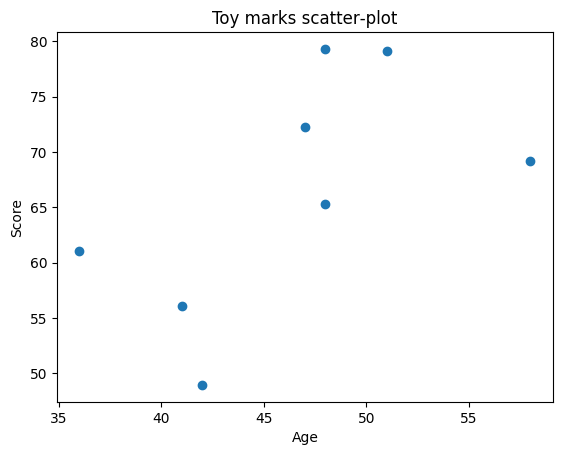

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df.age, df.score)
plt.xlabel('Age'); plt.ylabel('Score')
plt.title('Toy marks scatter‑plot')
plt.show()


## 13  |  Functions & composability

In [15]:
from typing import Sequence
def inner(u: Sequence[float], v: Sequence[float]) -> float:
    '''Return ⟨u,v⟩.'''
    if len(u)!=len(v):
        raise ValueError('size mismatch')
    return float(np.dot(u,v))
print(inner([1,2,3],[4,5,6]))


32.0


## 14  |  A tiny scikit‑learn teaser

In [16]:
from sklearn.linear_model import LinearRegression
X = np.random.randn(200,3)
beta = np.array([2,-1,0.5])
y = X @ beta + np.random.randn(200)*0.2
print(LinearRegression().fit(X,y).coef_)


[ 2.023 -0.988  0.486]
